# Week 1: Problem occuring during validation (Video part 25)

#### Problems during validation:
- 2 problems occuring during validation: validation stage; submission stage
- Usually caused by data inconsistency eg we get different optimal parameters for different folds and a significant difference in scores.
- When this happens during the submission stage, we can observe that validation score and leaderboard score does not match.
- This occurs when we can't mimic the exact train test split on our validation.




### Validation stage
- Possible reasons for different scores and different optimal parameters:
    - Too little data: When we have a lot of patterns and trends in the data but we don't have enough samples to generalize these patterns well. Model will utilize only some general patterns, and for each train validation split, these patterns will partially differ. This will lead to different scores of the model. Also, the different validation samples will only increase the dispersion of scores for different folds.
    - Too inconsistent data: eg when we have very similar samples with different target value. Consider when one of such samples is in train set and another is in validation set, we can get a pretty high error for the second sample. If both are in validation set, we can get smaller errors for them.
    - Too diverse data: eg when we are training model to predict sales for a month, and validation is the last available month in the data. If we have different months in our folds, eg for one folds we validate prediction results for January, and for another folds we validate for February -- the natural differences in both of the months will contribute to different scores (January has more holiday than February, thus it is expected that sales will be higher). We can reduce the diversity if we validate on the same month but different year.
 
- How to fix:
  - Make more thorough validation:
    - increase K in Kfolds (usually 5 is enough).
    - make kfolds validation several times with different random splits - use average scores to get a more stable estimate of model's quality.
    - if there is more chance to overfit, use one set of kfold splits to select parameters and another set of kfolds split to check model's quality.


### Submission stage
- Usually we can diagnose the issue by doing careful EDA.
- Observation:
    - LB score is consistently higher/lower than validation score.
    - LB score is not correlated with validation score at all.
- The main rule of making reliable validation is to mimic train/test split made by organizers so it is suggested that we start submitting solutions right after we enter competitions.
- Possible causes:
    - We may have quite different scores in our validation set, so considering the leaderboard as another validation set - it might not be so surprising to have different scores for the leaderboard too.
    - Too little data in public leaderboard: no workaround, just trust your validation and everything will be fine.
    - Train/test data are from different distribution: eg we want to predict a person's height from their photos in Instagram and the train set consist of photos only of women but test set consist of photos only of men, it is expected that our model prediction will be around the mean value for women and thus will have terrible score on the test set.
    - How to fix train/test from different distribution? One general approach is to figure out the optimal constant prediction for train and test data and try to shift your predictions by the difference. For this specific problem - we can calculate the mean height for women from the train set, but getting mean height for men is trickier. If the competition metric's is mean squared error, one possible workaround is to send 2 constant submissions, write down simple formula and find out the average target value for the test set (in general this technique is called leaderboard probing). So now we can calculate the differences between the average target vlaue for train and test data, for example 7inch in this example. Then in order to adjust our submission to the leaderboard, we can just add the 7inch to all our predictions.
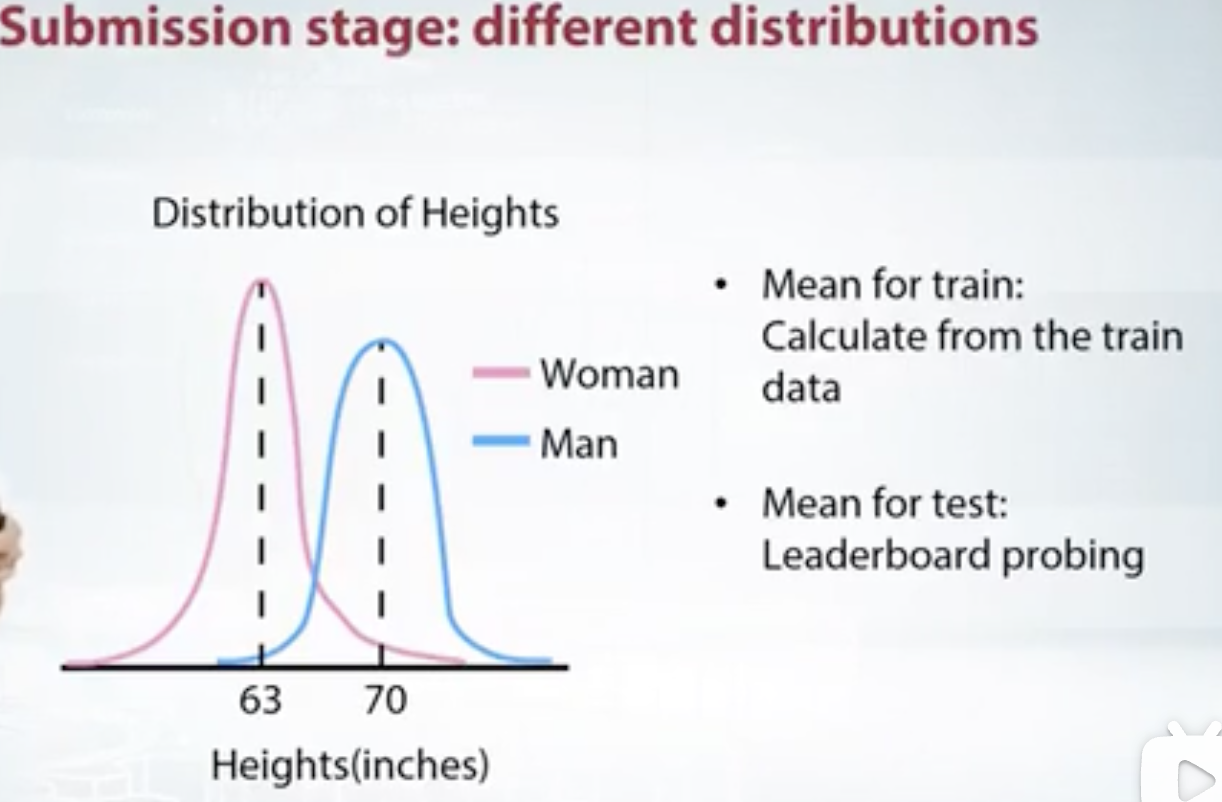
    - Fortunately, the above is rare. Normally, we have mixed distribution of different ratios. If the test set distribution consist mostly of men, then we can force our validation to have the same distribution. Main idea is to mimic the distribution of test set for validation. This will ensure our validation is fair and that we will get correct optimal parameters
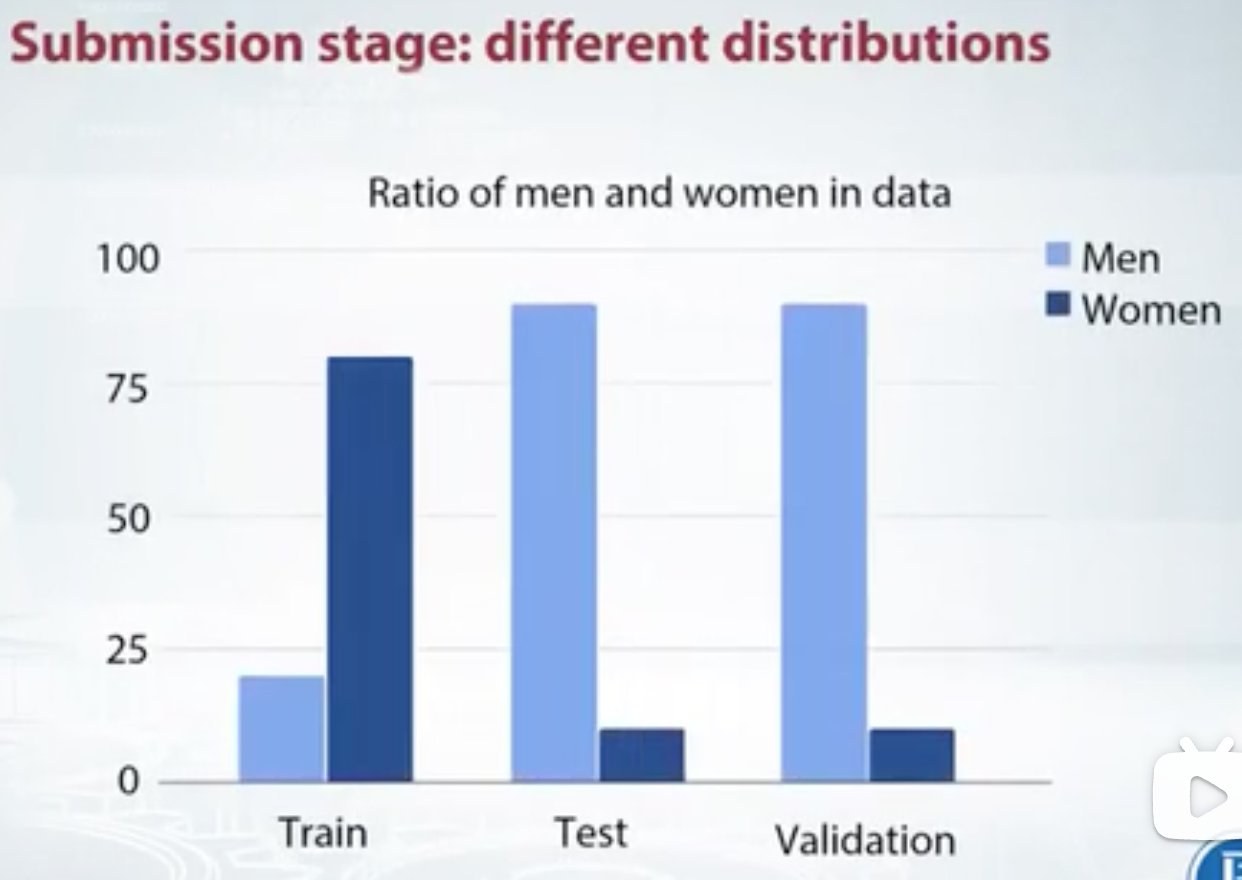

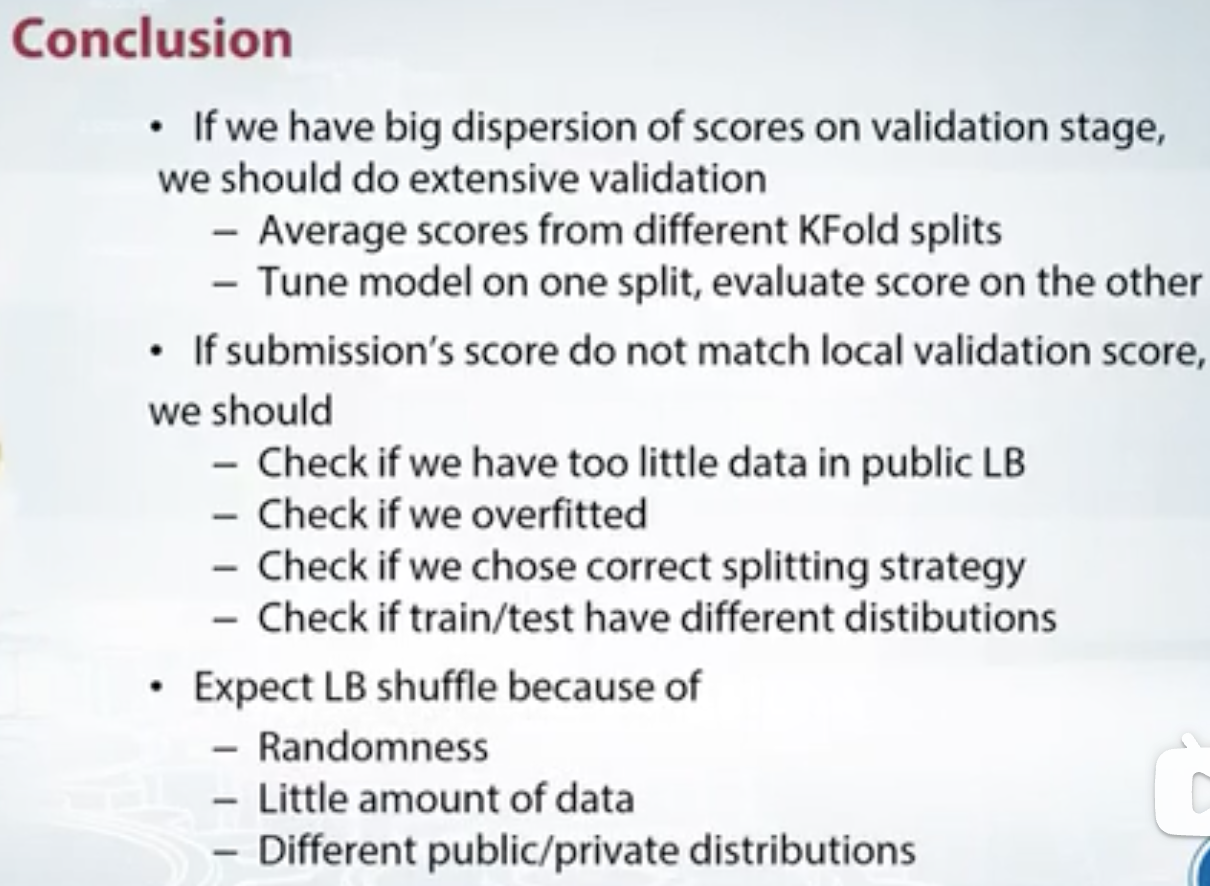

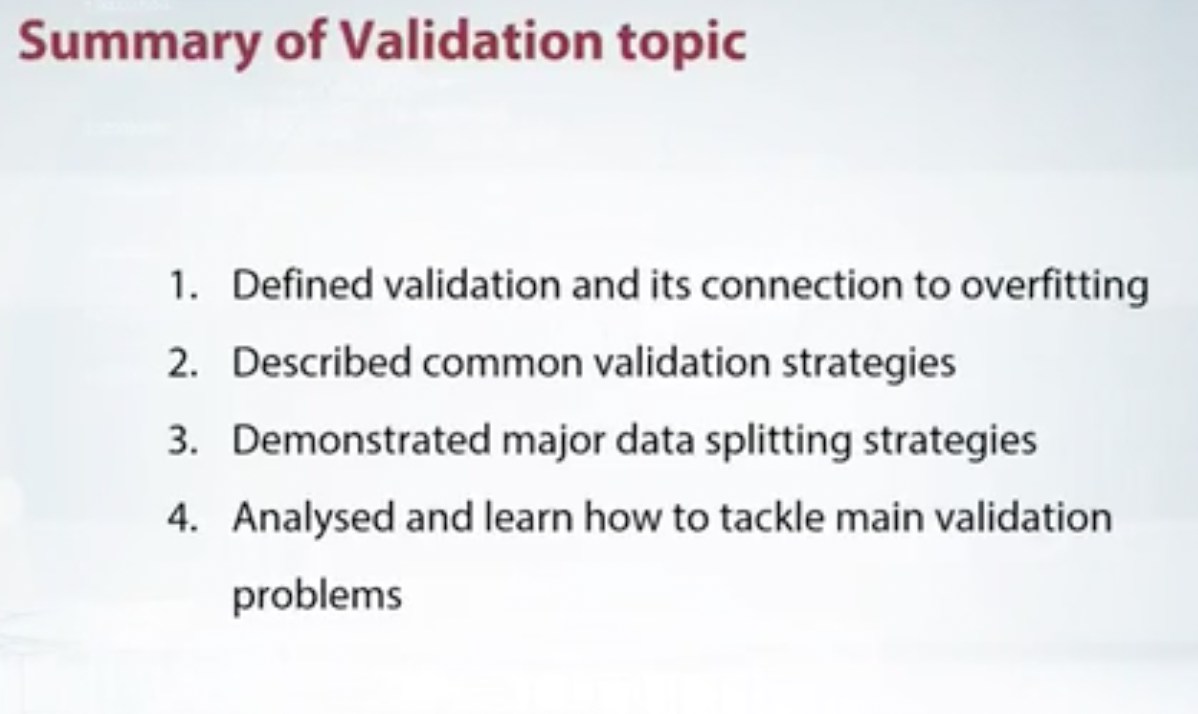

# What I learnt:
- Possible reasons for differences in validation score:
    - too little data, diverse data, inconsistent data
    - natural difference in folds - eg we are predicting sales for January for one fold, and sales for February for another fold.
    - different distribution in train and test set - usually the case in time series predictions
- (Competition tips) workaround when leaderboard and train set are from different distributions. Eg we are predicting heights, train set consist of women only, test set consist of men only.
  1. get average target value for women from train set
  2. get average target value for men from test set by submitting a few constant submissions and using the formula of competition metrics, we can probably derive the average target value for our test set population
  3. get the differences in our average target values for women and men
  4. add the differences to all our predictions for submission
- To ensure fair validation - we must mimic the distibution of test set for validation